### HW3_Part_02_Model application and evaluation

### Outline

1. Import package, import jma_dataset
2. Slice the dataset by exlucding data from Sea of Japan and latitude <25 and >45 degree north), see HW3_Part_01 for reason.
3. Split sliced_data into traning set and texting set as 80:20 ratio, and stick with this split for the rest of the work 
4. Using three predictors: density, depth, and salinity and build MLP regression model from scikit-learn 
5. Evalulate the model using R2 and RMSE (root mean squared error)
6. Using three predictors that are scaled (normalized)
7. Build "for" loop to find the best model performance, record the changes in R2 and RMSE
8. Once the best model is idensitified, use GBC_ARGO_dataset to test/validate the model
9. A linear regression between the predicted and observased Argo nitrate data is applied to assess the accuracy

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import data
infile = '../data/jma_nitrate.csv'

data = pd.read_csv(infile, sep=',')

print(data.columns)

Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')


### Slicing data

In [3]:
# slicling data with depth <1200 to better match with GBCArgo_data depth range
data = data[data.nitrate>=0  & (data.depth < 1200)]

# slicing off SEA OF JAPAN region
data = data[~ ((data.lat>=35) & (data.lon < 140))]

# slicing off latitude < 20 degree and > 45 region

data = data[((data.lat>=25) & (data.lat<45))]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13318 entries, 0 to 16220
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13318 non-null  int64  
 1   theta       13318 non-null  float64
 2   sal         13318 non-null  float64
 3   depth       13318 non-null  int64  
 4   nitrate     13318 non-null  float64
 5   lon         13318 non-null  float64
 6   lat         13318 non-null  float64
 7   date        13318 non-null  object 
 8   year        13318 non-null  float64
 9   month       13318 non-null  float64
 10  day         13318 non-null  float64
 11  profile     13318 non-null  float64
 12  cruise      13318 non-null  object 
 13  vessel      13318 non-null  object 
 14  density     13318 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 1.6+ MB


## Machine learning
###  MLP (Multilayer Perceptron) Regression 

* In scikit-learn, MLP (Multilayer Perceptron) Regression is a type of neural network model that can be used for regression tasks. It is a supervised learning algorithm that learns a function that maps inputs to outputs based on a given dataset of training examples (https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

* An MLP regression model consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of multiple nodes (neurons) that perform a nonlinear transformation of the input. The input is fed forward through the hidden layers and the output layer, and the output layer produces the final prediction.

* The MLP Regression algorithm is capable of learning nonlinear relationships between the input and output variables, making it a powerful tool for a wide range of regression problems. 

* However, it is also sensitive to the choice of hyperparameters such as the number of hidden layers, the number of neurons per layer, and the activation function used (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).



### Split dataset into training and testing sets

In [4]:
y = data.nitrate
## choose density, depth, salinity as three predictors
X = data[['density', 'depth','sal']]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

* train_test_split is a function in the sklearn.model_selection module of the scikit-learn library in Python.
* It's a utility function for splitting a dataset into two subsets, namely a training set and a testing set. 
* The train_test_split function takes in two mandatory arguments X and y, which are the feature matrix and target vector, respectively. 
* It also takes in two optional arguments test_size and random_state.
* random_state: This is an optional parameter that specifies the random seed to be used for the data splitting.
* setting the random_state parameter to a specific integer value will ensure that the data is split the same way every time the function is called with the same random_state value.



### Start with un_scaled parameters and build MLP regression model

In [5]:
# import the package sklearn, and  pick MLP model

from sklearn.neural_network import MLPRegressor

# create an MLP Regression model with 2 hidden layers

# can try layers 1-5

n  = int(input('Choose a number for hidden nodes: '))

model = MLPRegressor(hidden_layer_sizes=(n,), activation='relu', solver='adam',max_iter=10000)

# fit the model to the training data
model.fit(X_train,y_train)

# make predictions on testing data
y_pred = model.predict(X_test)

Choose a number for hidden nodes: 2


### r2 and RMSE and plot the model output

R^2 score: 0.93
r2 = 0.9280175167483796
r2 = 0.9136442627324683
MSE = 22.495460651430015


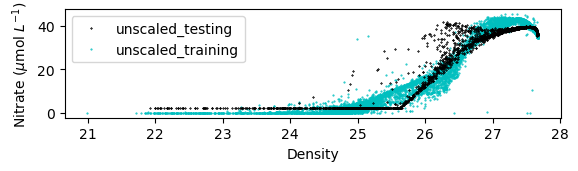

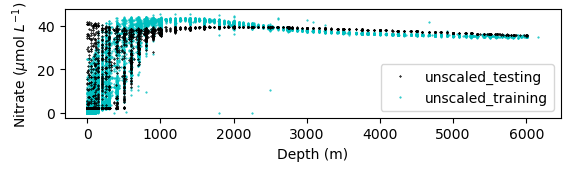

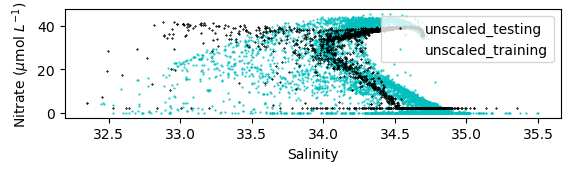

In [6]:
# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(X_train,y_train)))

from sklearn.metrics import mean_squared_error, r2_score

print('r2 =', r2_score(y_train, model.predict(X_train)))
print('r2 =', r2_score(y_test, y_pred))
print('MSE =',mean_squared_error(y_test, y_pred))

# now plot the result
plt.subplot(3,1,1)
plt.plot(X_test['density'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'unscaled_testing') #
plt.plot(X_train['density'], y_train, 'oc', zorder = 0, markersize=0.5,label = 'unscaled_training') # this is measured data from the training set
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Density')
plt.gca().legend(loc = 'upper left')
plt.show()

plt.subplot(3,1,2)
plt.plot(X_test['depth'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'unscaled_testing')
plt.plot(X_train['depth'], y_train, 'oc', zorder = 0, markersize=0.5,label = 'unscaled_training')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Depth (m)')
plt.gca().legend(loc = 'lower right')
plt.show()

plt.subplot(3,1,3)
plt.plot(X_test['sal'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'unscaled_testing')
plt.plot(X_train['sal'], y_train, 'oc', zorder = 0, markersize=0.5,label = 'unscaled_training')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Salinity')
plt.gca().legend(loc = 'upper right')
plt.show()

### Using scaled parameters now

In [7]:
# scale parameters
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

standardized_X = scaler.transform(X_train)

standardized_X_test = scaler.transform(X_test)


### Train model again

In [8]:
# Train the model using the training sets

model = MLPRegressor(hidden_layer_sizes=(n,), activation='relu', solver='adam',max_iter=10000)

model.fit(standardized_X, y_train)
# Make predictions using the testing set
y_pred = model.predict(standardized_X_test)

### Output

R^2 score: 0.98
r2 = 0.9792889703438955
r2 = 0.9799938282662957
MSE = 5.2115593388664045


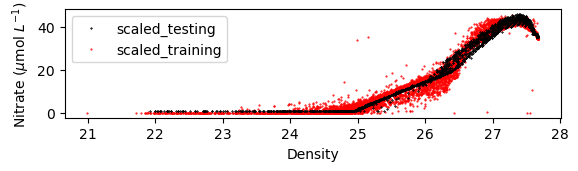

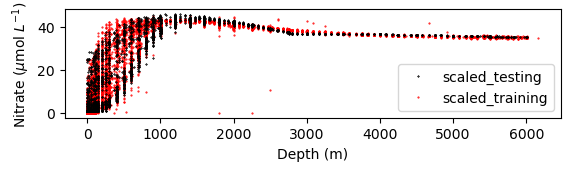

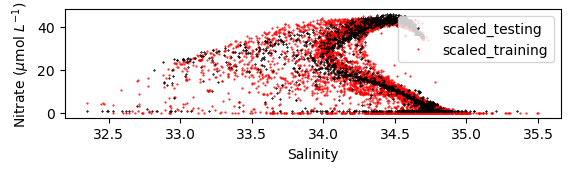

In [9]:
# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(standardized_X,y_train)))

print('r2 =', r2_score(y_train, model.predict(standardized_X)))
print('r2 =', r2_score(y_test, y_pred))
print('MSE =',mean_squared_error(y_test, y_pred))

# now plot the result
plt.subplot(3,1,1)
plt.plot(X_test['density'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'scaled_testing') #
plt.plot(X_train['density'], y_train, 'or', zorder = 0, markersize=0.5,label = 'scaled_training') # this is measured data from the training set
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Density')
plt.gca().legend(loc = 'upper left')
plt.show()

plt.subplot(3,1,2)
plt.plot(X_test['depth'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'scaled_testing')
plt.plot(X_train['depth'], y_train, 'or', zorder = 0, markersize=0.5,label = 'scaled_training')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Depth (m)')
plt.gca().legend(loc = 'lower right')
plt.show()
plt.subplot(3,1,3)
plt.plot(X_test['sal'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'scaled_testing')
plt.plot(X_train['sal'], y_train, 'or', zorder = 0, markersize=0.5,label = 'scaled_training')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Salinity')
plt.gca().legend(loc = 'upper right')
plt.show()

### Regression loop

* n=n_range(1,11,1)
* save each time's output r2 and RMSE and plot them against n


In [10]:
# now build a loop to test how well different number of hidden layers performs

scores = {}
r2_list = []
RMSE = {}
RMSE_list = []
n_range = range(1, 11, 1)

for n in n_range:
    print(n)
    model = MLPRegressor(hidden_layer_sizes=(n,), activation='relu', solver='adam',max_iter=10000)
    model.fit(standardized_X, y_train)
   # Make predictions using the testing set
    y_pred = model.predict(standardized_X_test)   
    scores[n] = r2_score(y_test,y_pred)
    RMSE[n] = mean_squared_error(y_test,y_pred)
    RMSE_list.append(mean_squared_error(y_test,y_pred))
    r2_list.append(r2_score(y_test,y_pred))
    print('r2 =', scores[n])
    print('RMSE =', RMSE[n])     

1
r2 = 0.9638230418457658
RMSE = 9.424010081991243
2
r2 = 0.9793048250428701
RMSE = 5.3910430117723465
3
r2 = 0.9819087575014351
RMSE = 4.712724905597653
4
r2 = 0.9904225348146463
RMSE = 2.49490651153958
5
r2 = 0.991055144551768
RMSE = 2.330113205391928
6
r2 = 0.9915359211293415
RMSE = 2.204872070000684
7
r2 = 0.9910923259584746
RMSE = 2.320427538891947
8
r2 = 0.9934381750605529
RMSE = 1.7093395227418828
9
r2 = 0.9930423291585626
RMSE = 1.8124564226030333
10
r2 = 0.9937449413982493
RMSE = 1.6294276338831652


### Plot the RMSE and r2 against n

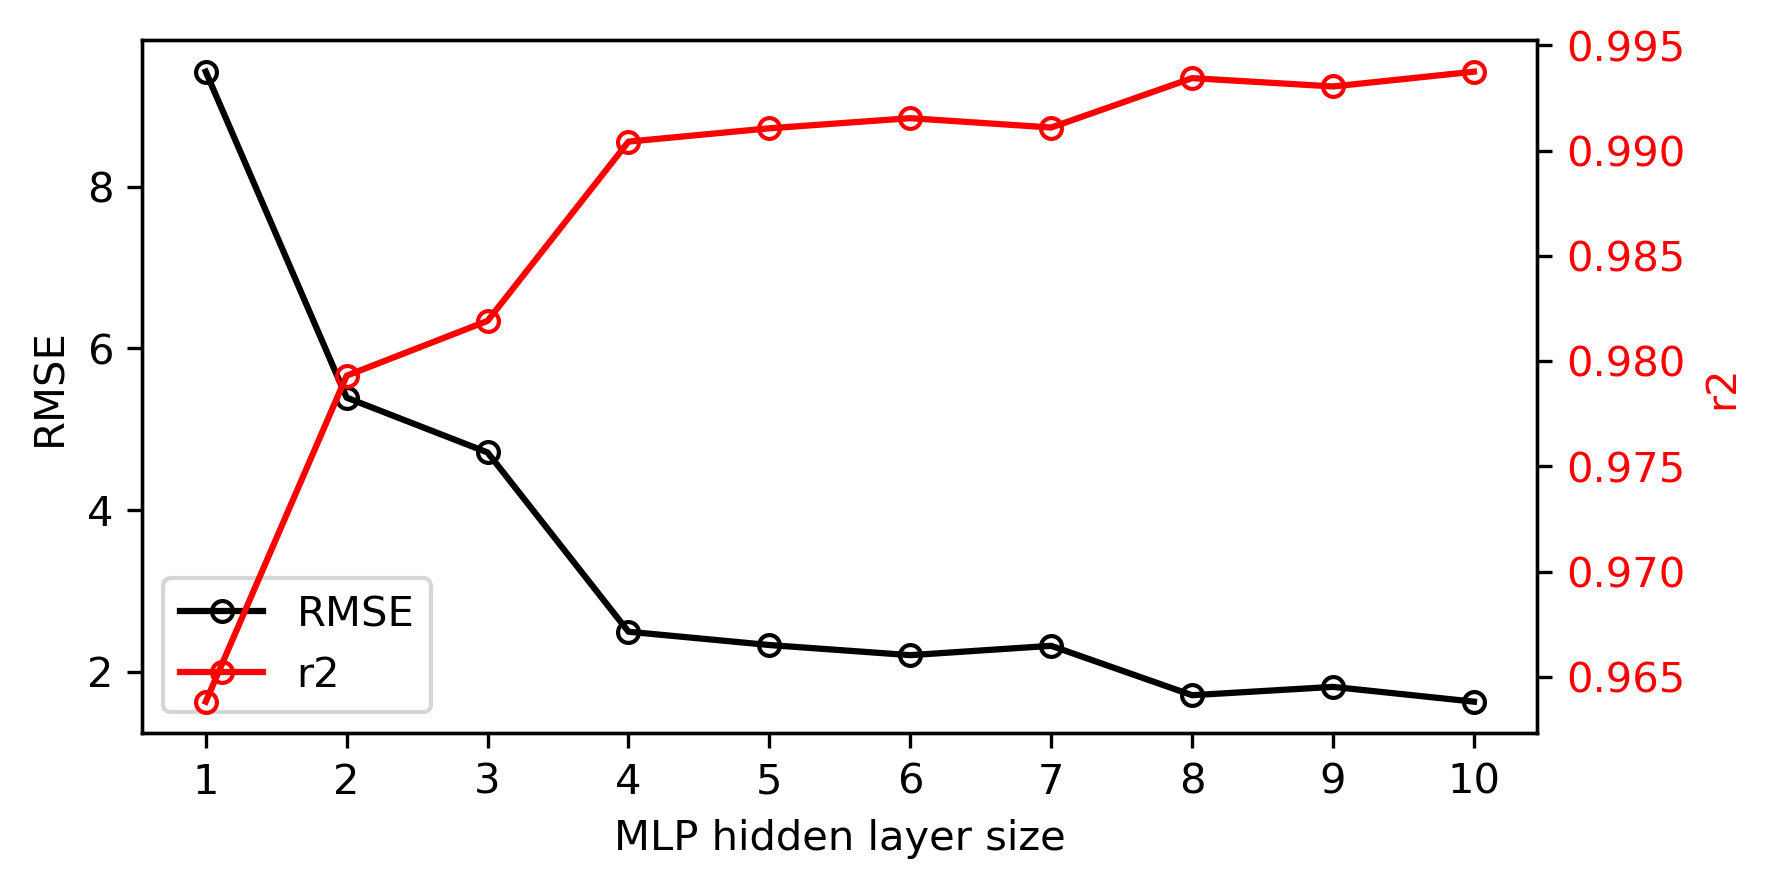

In [11]:
# plot both variables on the same plot

fig, ax1 = plt.subplots(figsize = (6,3), dpi = 300, sharex = 'all')
ax2 = ax1.twinx()

l1 = ax1.plot(n_range, RMSE_list, '-ok', markersize = 5, markerfacecolor = 'None', label = 'RMSE')
ax1.set_ylabel('RMSE', color = 'k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# ax1.set_xticks([0, 1, 2, 3, 4, 5])
ax1.set_xticklabels(['0',  '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
ax1.set_xlabel('MLP hidden layer size')

l2 = ax2.plot(n_range, r2_list, '-or', markersize = 5, markerfacecolor = 'None', label = 'r2')
ax2.set_ylabel('r2', color = 'red')
ax2.tick_params(axis='y', labelcolor='red')

lns = l1+l2
labs = [l.get_label() for l in lns]

ax1.legend(lns, labs,loc = 'lower left')
plt.show()
  

### Find which number yeild the lowest MSE


In [12]:
# find which number yeild the lowest MSE
ind = RMSE_list.index(min(RMSE_list))
print('The best hidden layer size is:', n_range[ind])

model = MLPRegressor(hidden_layer_sizes=(n_range[ind],), activation='relu', solver='adam',max_iter=10000)

model.fit(standardized_X, y_train)
# Make predictions using the testing set
y_pred = model.predict(standardized_X_test)

The best hidden layer size is: 10


### Show the best model output when n=?

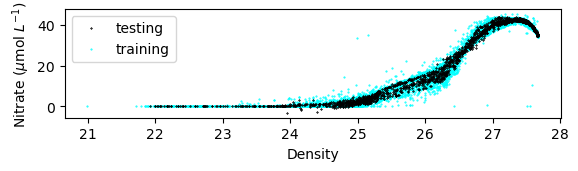

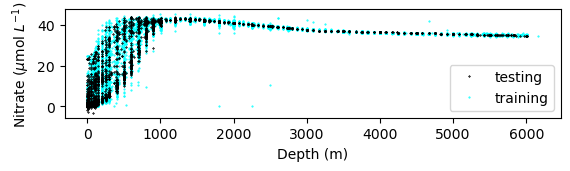

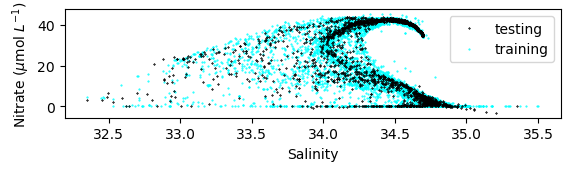

In [13]:
# now plot the result
plt.subplot(3,1,1)
plt.plot(X_test['density'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'testing') #
plt.plot(X_train['density'], y_train, 'o',color='cyan', zorder = 0, markersize=0.5,label = 'training') # this is measured data from the training set
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Density')
plt.gca().legend(loc = 'upper left')
plt.show()

plt.subplot(3,1,2)
plt.plot(X_test['depth'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'testing')
plt.plot(X_train['depth'], y_train, 'o',color='cyan', zorder = 0, markersize=0.5,label = 'training')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Depth (m)')
plt.gca().legend(loc = 'lower right')
plt.show()
plt.subplot(3,1,3)
plt.plot(X_test['sal'], y_pred, 'xk', alpha = 0.8, markersize=1,label = 'testing')
plt.plot(X_train['sal'], y_train, 'o',color='cyan', zorder = 0, markersize=0.5,label = 'training')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Salinity')
plt.gca().legend(loc = 'upper right')
plt.show()

* try to use different color, to put all of the parameter together to evaluate the performance

### Now use GBC_Argo data to test the model

In [14]:
# import data
infile_BGCArgo = '../data/kuro_BGCargo_NO3.csv'

data_Argo = pd.read_csv(infile_BGCArgo, sep=',')


print(data_Argo.columns)

# replace column names using more user-friedly names

data_Argo = data_Argo.rename(columns={'Date/GMT': 'date', 'Days since 1/1/1900': 'days', 'NITRATE[uMOL/KG]': 'nitrate', 'DEPTH[M]':'depth',
                                    'PRESSURE[DBAR]':'pres','NA':'NA','SALINITY[PSS]':'sal','TEMPERATURE[C]':'temp','SIGMATHETA[KG/M3]':'density',
                                     'OXYGEN[uMOL/KG]':'oxy', 'OXYGENSAT':'oxysat','LON': 'lon', 'LAT':'lat'})
print(data_Argo.columns)


Index(['Date/GMT', 'Days since 1/1/1900', 'NITRATE[uMOL/KG]', 'DEPTH[M]',
       'PRESSURE[DBAR]', 'NA', 'SALINITY[PSS]', 'TEMPERATURE[C]',
       'SIGMATHETA[KG/M3]', 'OXYGEN[uMOL/KG]', 'OXYGENSAT', 'LON', 'LAT'],
      dtype='object')
Index(['date', 'days', 'nitrate', 'depth', 'pres', 'NA', 'sal', 'temp',
       'density', 'oxy', 'oxysat', 'lon', 'lat'],
      dtype='object')


* Scale GBC_Argo parameters
* Density, depth might be better

In [15]:
y = data_Argo.nitrate
## choose density, depth, salinity as three predictors
X = data_Argo[['density', 'depth','sal']]

# scale the paraameters
standardized_X = scaler.transform(X)

# apply the best model from JMA dataset to GBC_Argo 
y_pred_GBC = model.predict(standardized_X)

print('r2 =', r2_score(y, y_pred_GBC ))
print('MSE =',mean_squared_error(y, y_pred_GBC))

r2 = 0.950446317870332
MSE = 8.642504996368638


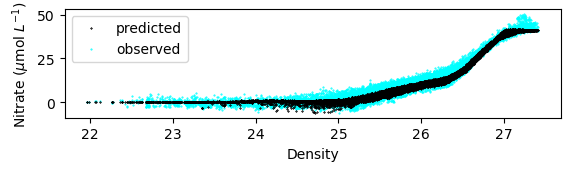

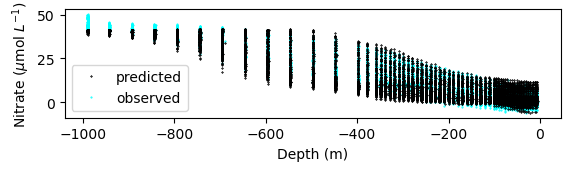

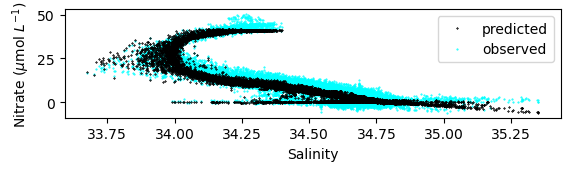

In [16]:
# now plot the result
plt.subplot(3,1,1)
plt.plot(X['density'], y_pred_GBC , 'xk', alpha = 0.8, markersize=1,label = 'predicted')
plt.plot(X['density'], y, 'o',color='cyan', zorder = 0, markersize=0.5,label = 'observed')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Density')
plt.gca().legend(loc = 'upper left')
plt.show()

plt.subplot(3,1,2)
plt.plot(X['depth'], y_pred_GBC, 'xk', alpha = 0.8, markersize=1,label = 'predicted')
plt.plot(X['depth'], y, 'o',color='cyan', zorder = 0, markersize=0.5,label = 'observed')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Depth (m)')
plt.gca().legend(loc = 'lower left')
plt.show()

plt.subplot(3,1,3)
plt.plot(X['sal'], y_pred_GBC, 'xk', alpha = 0.8, markersize=1,label = 'predicted')
plt.plot(X['sal'], y, 'o',color='cyan', zorder = 0, markersize=0.5,label = 'observed')
plt.ylabel('Nitrate ($\mu$mol $L^{-1}$)')
plt.xlabel('Salinity')
plt.gca().legend(loc = 'upper right')
plt.show()

Slope: 0.9476482733059554
Intercept: -0.7393782234009283
R-value: 0.9802235981043215
P-value: 0.0
Standard error: 0.0015061969060308172


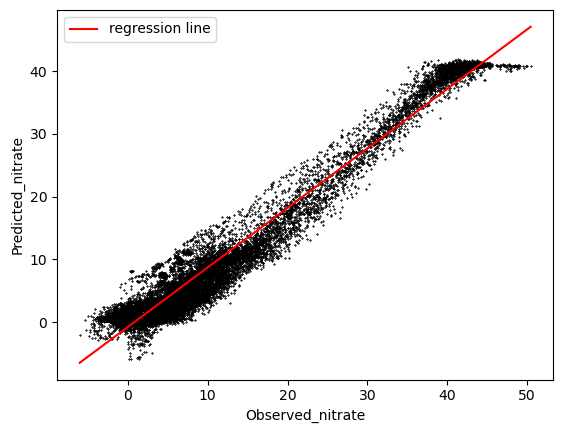

In [17]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(y, y_pred_GBC)

# Print the results
print(f"Slope: {slope}") 
# 'f' string is a formatted string that contains varibles values in '{}'
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# plot

plt.plot(y, y_pred_GBC, 'xk', alpha = 0.8, markersize=1)  
plt.xlabel('Observed_nitrate')
plt.ylabel('Predicted_nitrate')
x_values = [min(y), max(y)]
y_values = [slope*y + intercept for y in x_values]
plt.plot(x_values, y_values, color='red', label='regression line')
plt.gca().legend(loc = 'upper left')
plt.show()

### Preliminary conclusion

* In this practice, the best MLP_hidden layer number was 10, it might consume a lot computing power. 

* Intuitively, density might be a better predictor than the other two (salinity and depth), further validation on statistics can be made to assess each of the parameters individually. 

* It is a successful model application and valuation based on the almost 1:1 ratio line between the predicted nitrate and observed nitrate and good R-value (0.98) between them. The intercept was close to 0 as well. 